# Prediction / forecasting of electrical power consumption with LSTM network

## 1 - Load Electrical Power Consumption Dataset

## 1.1 - Load data from Google Drive once uploaded in it (the original data file can be download from Kaggle - [here](https://www.kaggle.com/uciml/electric-power-consumption-data-set))

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Loading dataset
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/household_power_consumption.txt', sep=';')
df.head()


Mounted at /content/gdrive


<ipython-input-1-4803d293b6b1>:9: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


## 1.2 - Prepare data with Pandas

In [2]:
# Reduce the number samples to 50000
df = df.iloc[:50000]
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


### 1.2.1 - Merge Date & Time into one additonnal column and change to datetime type

In [3]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


### 1.2.2 - Convert `Global_active_power to numeric such that an invalid parsing is replaced with NaN

In [4]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


In [5]:
nan_count = df['Global_active_power'].isna().sum()
print(f' NaN count for Global_active_power : {nan_count}')

 NaN count for Global_active_power : 5


### 1.2.3 - Drop rows where `Global_active_power` is NaN

In [6]:
df.dropna(subset=['Global_active_power'], inplace=True)

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


In [8]:
print(f'Number of lines after deletion : {len(df)}')


Number of lines after deletion : 49995


### 1.2.4 - Add columns defining the year, quarter, month and day of the date

In [9]:
df['Year'] = df['Datetime'].dt.year
df['Quarter'] = df['Datetime'].dt.quarter
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Quarter,Month,Day
0,16/12/2006,17:24:00,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00,2006,4,12,16
1,16/12/2006,17:25:00,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00,2006,4,12,16
2,16/12/2006,17:26:00,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00,2006,4,12,16
3,16/12/2006,17:27:00,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00,2006,4,12,16
4,16/12/2006,17:28:00,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00,2006,4,12,16


### 1.2.5 - Keep only `date_time`, `Global_active_power`, `year`, `quarter`, `month` and `day` columns

In [10]:
df = df[['Datetime', 'Global_active_power', 'Year', 'Quarter', 'Month', 'Day']]

df.head()

,Datetime,Global_active_power,Year,Quarter,Month,Day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16


### 1.2.6 - Sort rows according to `date_time`, reset the index, and add a column defining whether the day is a weekday or not

In [11]:
df.sort_values(by='Datetime', inplace=True)

df.reset_index(drop=True, inplace=True)

# 0 = Sat, ..., Wed = ... (Weekday)
df['Is_Weekday'] = df['Datetime'].dt.dayofweek < 5

df.head()

,Datetime,Global_active_power,Year,Quarter,Month,Day,Is_Weekday
0,2006-12-16 17:24:00,4.2160,2006,4,12,16,False
1,2006-12-16 17:25:00,5.3600,2006,4,12,16,False
2,2006-12-16 17:26:00,5.3740,2006,4,12,16,False
3,2006-12-16 17:27:00,5.3880,2006,4,12,16,False
4,2006-12-16 17:28:00,3.6660,2006,4,12,16,False


In [12]:
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df['Datetime'].min())
print('The time series ends on: ', df['Datetime'].max())


Number of rows and columns after removing missing values: (49995, 7)
The time series starts from:  2006-12-16 17:24:00
The time series ends on:  2007-01-20 10:43:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             49995 non-null  datetime64[ns]
 1   Global_active_power  49995 non-null  float64       
 2   Year                 49995 non-null  int32         
 3   Quarter              49995 non-null  int32         
 4   Month                49995 non-null  int32         
 5   Day                  49995 non-null  int32         
 6   Is_Weekday           49995 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int32(4)
memory usage: 1.6 MB


In [14]:
print(df.columns)

Index(['Datetime', 'Global_active_power', 'Year', 'Quarter', 'Month', 'Day',
       'Is_Weekday'],
      dtype='object')


## 2 - Make some plots to show the data evolve over time

## 2.1 - Plot `Global_active_power` for all the time range

<ipython-input-15-3b5c9eb8f703>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_filtered.resample('H', on='Datetime').mean()


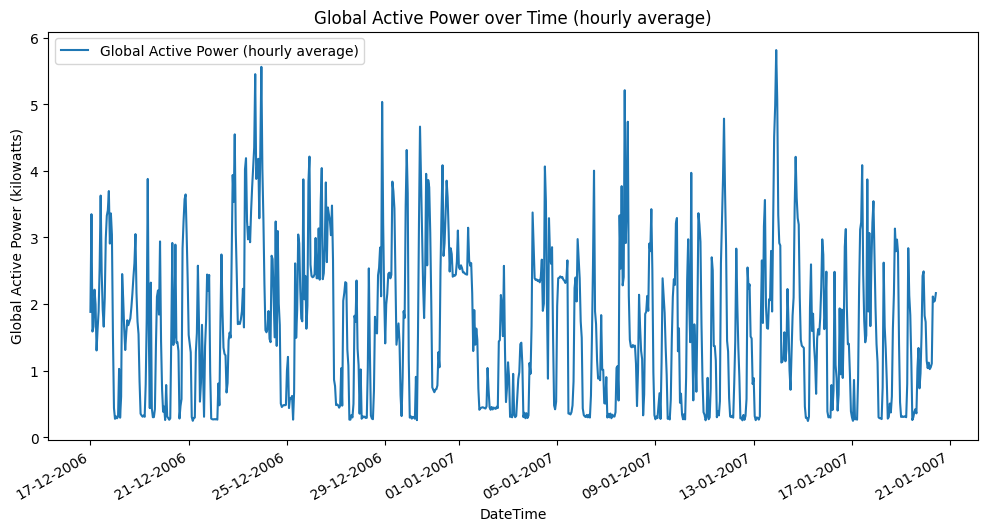

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the DataFrame for the specific date range
start_date = '2006-12-17'
end_date = '2007-01-21'
mask = (df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)
df_filtered = df.loc[mask]

# Resample `Global_active_power` on an hourly basis
df_resampled = df_filtered.resample('H', on='Datetime').mean()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Global_active_power'], label='Global Active Power (hourly average)')

# Format the x-axis to show only dates in "day-month-year" format without hours and minutes
date_format = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time (hourly average)')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()

## 2.2 - Display same information, but resampled over Day, Week, Month, Quarter, and Year using four subplots

In [16]:
import datetime

fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)


<Figure size 1800x1600 with 0 Axes>

<ipython-input-17-5b8ff1bff6c4>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_filtered.resample('M', on='Datetime').mean()
<ipython-input-17-5b8ff1bff6c4>:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df_filtered.resample('Y', on='Datetime').mean()


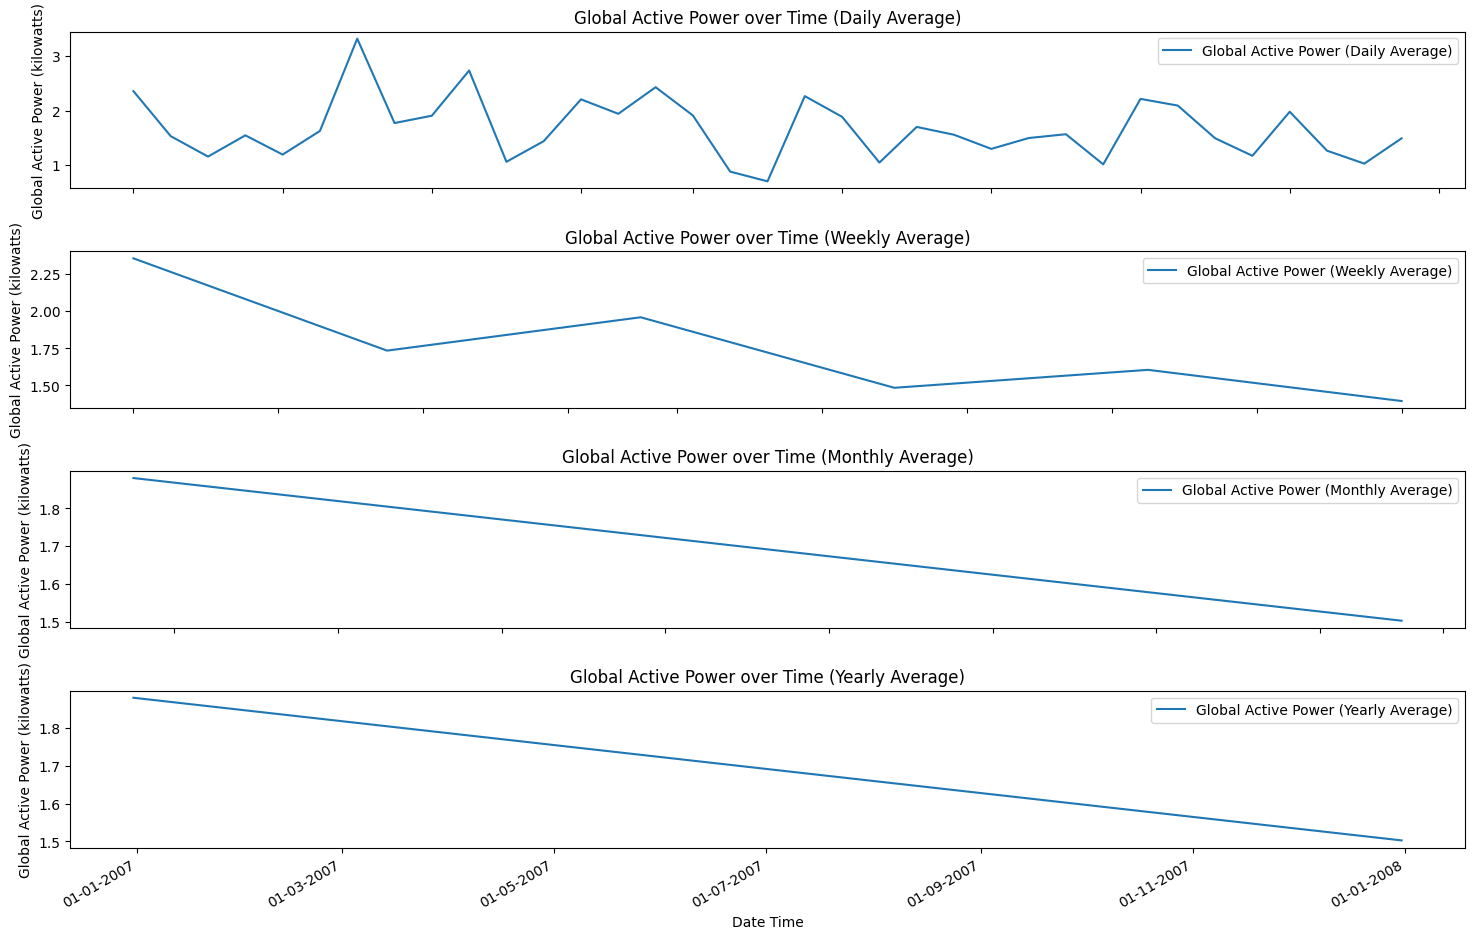

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the DataFrame for the specific date range
start_date = '2006-12-17'
end_date = '2007-01-21'
mask = (df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)
df_filtered = df.loc[mask]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4)

# Resample and plot for daily average
df_daily = df_filtered.resample('D', on='Datetime').mean()
axes[0].plot(df_daily.index, df_daily['Global_active_power'], label='Global Active Power (Daily Average)')
axes[0].set_title('Global Active Power over Time (Daily Average)')
axes[0].set_ylabel('Global Active Power (kilowatts)')
axes[0].legend()
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Resample and plot for weekly average
df_weekly = df_filtered.resample('W', on='Datetime').mean()
axes[1].plot(df_weekly.index, df_weekly['Global_active_power'], label='Global Active Power (Weekly Average)')
axes[1].set_title('Global Active Power over Time (Weekly Average)')
axes[1].set_ylabel('Global Active Power (kilowatts)')
axes[1].legend()
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Resample and plot for weekly average
df_monthly = df_filtered.resample('M', on='Datetime').mean()
axes[2].plot(df_monthly.index, df_monthly['Global_active_power'], label='Global Active Power (Monthly Average)')
axes[2].set_title('Global Active Power over Time (Monthly Average)')
axes[2].set_ylabel('Global Active Power (kilowatts)')
axes[2].legend()
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Resample and plot for weekly average
df_yearly = df_filtered.resample('Y', on='Datetime').mean()
axes[3].plot(df_yearly.index, df_yearly['Global_active_power'], label='Global Active Power (Yearly Average)')
axes[3].set_title('Global Active Power over Time (Yearly Average)')
axes[3].set_ylabel('Global Active Power (kilowatts)')
axes[3].legend()
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Set common labels
plt.xlabel('Date Time')
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()

# 3 - Build dataset from `Global_active_power` data

## 3.1 - Build dataset as a numy array from column `Global_active_power` of the Panda dataframe

In [18]:
import numpy as np

global_active_power_array = df['Global_active_power'].values

print(global_active_power_array.shape)


(49995,)


## 3.2 - Normalize the data by mapping them in $[0;1]$. What is standardization?

The `preprocessing` module of `sklearn` provides a function to do that, or you may do it by hand hy defining your own function.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

global_active_power_normalized = scaler.fit_transform(df[['Global_active_power']])

print(global_active_power_normalized)

[[0.44304913]
 [0.56906808]
 [0.57061027]
 ...
 [0.39171624]
 [0.1852831 ]
 [0.15245649]]


## 3.3 - Split the dataset into training data and testing data, with 80% of the samples for training

In [20]:
from sklearn.model_selection import train_test_split

# Diviser les données en 80% pour l'entraînement et 20% pour les tests
X_train, X_test = train_test_split(global_active_power_normalized, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles
print(f"Trainning set: {X_train.shape}")
print(f"test test: {X_test.shape}")


Trainning set: (39996, 1)
test test: (9999, 1)


## 3.4 - Define a function `create_dataset` that takes data and returns X and Y

*   X and Y are, respectively, the input vector of size lookback and the output one to be predicted.
*   The lookback value defines the number of time steps used as history data to predict the next step. For example, if the dataset is [0,1,2,3,4,5,6] and we have lookback value of 3, then the samples will be: X[0],Y[0]=[0,1,2],[3]; X[1],Y[1]=[1,2,3],[4], etc.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

scaler = MinMaxScaler()
df['Global_active_power'] = scaler.fit_transform(df[['Global_active_power']])

def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

*   Use create_dataset to build the training and testing sets with a lookback value of 20



In [22]:
lookback = 20
X_train, Y_train = create_dataset(train['Global_active_power'].values, lookback)
X_test, Y_test = create_dataset(test['Global_active_power'].values, lookback)


*   Reshape the input vectors to be [sample_id, time_steps, features], where features is the number of component of a sample. In this case, the number of features given at each time step is equal to one.



In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f" X shape: {X_train}")
print(f" test X shape: {X_test}")


 X shape: [[[0.44304913]
  [0.56906808]
  [0.57061027]
  ...
  [0.35646618]
  [0.33840053]
  [0.3892928 ]]

 [[0.56906808]
  [0.57061027]
  [0.57215246]
  ...
  [0.33840053]
  [0.3892928 ]
  [0.62789161]]

 [[0.57061027]
  [0.57215246]
  [0.3824631 ]
  ...
  [0.3892928 ]
  [0.62789161]
  [0.82749504]]

 ...

 [[0.22383785]
  [0.21855034]
  [0.22163472]
  ...
  [0.21260189]
  [0.21238158]
  [0.21326283]]

 [[0.21855034]
  [0.22163472]
  [0.22207535]
  ...
  [0.21238158]
  [0.21326283]
  [0.21282221]]

 [[0.22163472]
  [0.22207535]
  [0.22339722]
  ...
  [0.21326283]
  [0.21282221]
  [0.20026438]]]
 test X shape: [[[0.08790482]
  [0.08724389]
  [0.08592201]
  ...
  [0.06851729]
  [0.06895792]
  [0.06895792]]

 [[0.08724389]
  [0.08592201]
  [0.08526107]
  ...
  [0.06895792]
  [0.06895792]
  [0.06873761]]

 [[0.08592201]
  [0.08526107]
  [0.08415951]
  ...
  [0.06895792]
  [0.06873761]
  [0.06917823]]

 ...

 [[0.08085481]
  [0.07997356]
  [0.25358008]
  ...
  [0.39568187]
  [0.39303811]


# 4 - Define the neural network model

Use the Mean Squarred Error for loss function and Adam as optimizer

In [25]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Ajout de Dropout pour éviter le sur-apprentissage
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 5 - Train the neural network model

* Use test set as validation data
* Try different `batch_size` values
* Enable early stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping], verbose=1)



Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 12/50
1250/1250 ━

# 6 - Get the predictions for both training and testing sets and map them back in the original range of the data values


In [27]:
# predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# 7 - Compute some statistics on the data to estimate the accuracy of the predictions

Use `sklearn` to compute:

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)

In [28]:
print("Training MAE:", mean_absolute_error(Y_train, train_predictions))
print("Training RMSE:", np.sqrt(mean_squared_error(Y_train, train_predictions)))
print("Testing MAE:", mean_absolute_error(Y_test, test_predictions))
print("Testing RMSE:", np.sqrt(mean_squared_error(Y_test, test_predictions)))


Training MAE: 0.1630240738293695
Training RMSE: 0.3431447772543764
Testing MAE: 0.2136243509268115
Testing RMSE: 0.4262074285255871


# 8 - Plot the loss values obtained for the training data and the validation data over the number of epochs

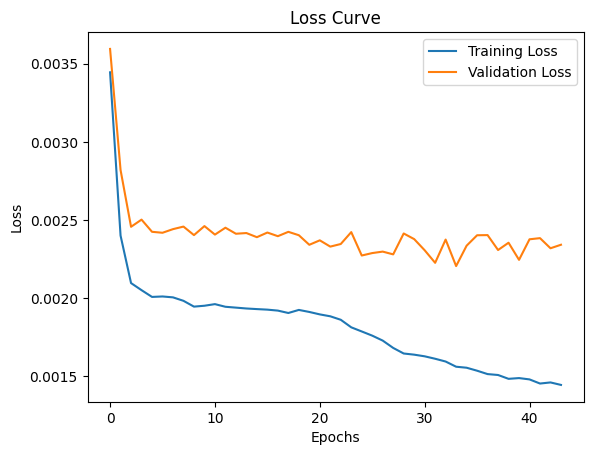

In [29]:
# Visualisation de la courbe de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 9 - Plot the original test data and the one predicted by the neural network

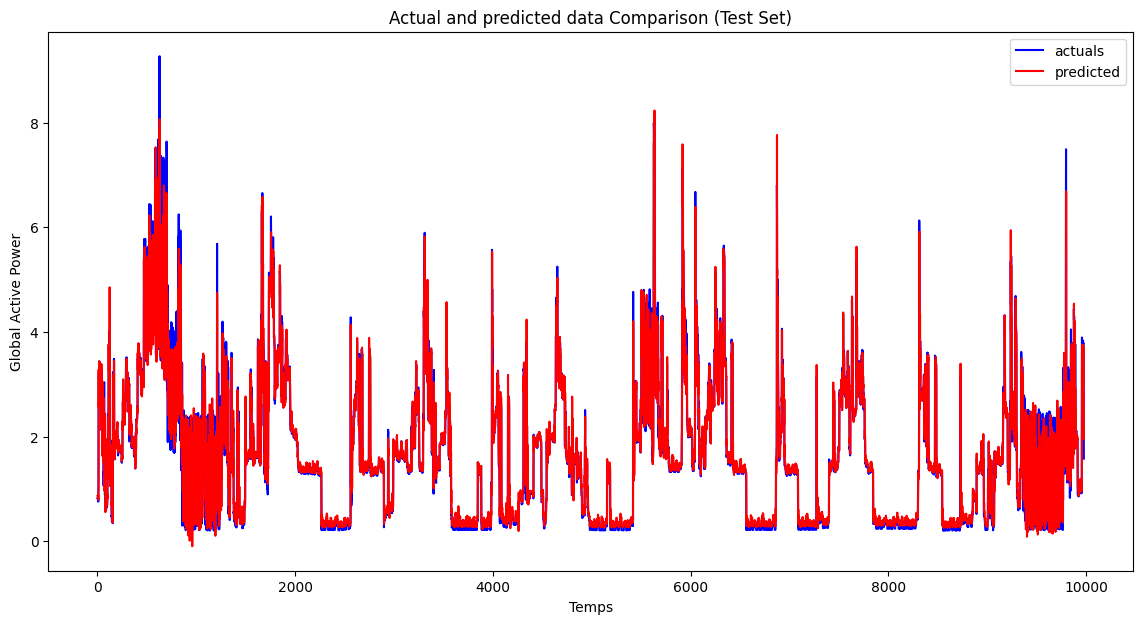

In [30]:
# Visualize results with actual and predicted data
plt.figure(figsize=(14,7))
plt.plot(Y_test, label='actuals', color='blue')
plt.plot(test_predictions, label='predicted', color='red')
plt.title('Actual and predicted data Comparison (Test Set)')
plt.xlabel('Temps')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()


In [33]:
import pandas as pd

# Save data for the first history as an example
batch_size = 32  # Replace with the batch size used for this history

# Combine loss data for export
data_to_save = pd.DataFrame({
    'Train Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Batch Size': [batch_size] * len(history.history['loss'])  # Repeat batch size for each epoch
})

# Save the CSV file
data_to_save.to_csv('lab-Elec-timeseries_dataset-LSTM.csv', index=False)
print("CSV file saved: lab-Elec-timeseries_dataset-LSTM.csv")


CSV file saved: lab-Elec-timeseries_dataset-LSTM.csv
